### Sentiment Analysis

Importing libraries

In [2]:
import pandas as pd
import numpy as np
import re
from operator import or_
from functools import reduce
from textblob import TextBlob
import datetime as dt
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

For the sentiment analysis we're going to use a slightly better performing approach than bag-of-words, provided by the library [Text Blob](https://textblob.readthedocs.io/en/dev/).
Possible improvements include the use of [Stanford CoreNLP](https://stanfordnlp.github.io/CoreNLP/), based on a deep learning model, or [SentiStrength](http://sentistrength.wlv.ac.uk/), tailored specifically for short and informal texts.

In [4]:
df = pd.read_csv("/Volumes/New Volume/QueryResults/queryen.csv")

In [8]:
df.head()

,_id,user.screen_name,created_at,timestamp_ms,text
0,ObjectId(5e41133f808db91a0bd4a5b5),charliemasina_,Sun Jun 02 06:37:00 +0000 2019,1559457420658,RT @ShowYourFoood: Deshelled Crabs https://t.c...
1,ObjectId(5e41133f808db91a0bd4a5b6),abegaildelrosa7,Sun Jun 02 06:37:00 +0000 2019,1559457420662,RT @annesessary: Texts i get from my boyfriend...
2,ObjectId(5e41133f808db91a0bd4a5b7),AsheleyRockz,Sun Jun 02 06:37:00 +0000 2019,1559457420666,RT @doyou_bangtan: easy 🍋 peasy 😭 lemon 🍋 sque...
3,ObjectId(5e41133f808db91a0bd4a5b8),haruists,Sun Jun 02 06:37:00 +0000 2019,1559457420663,my picks better pull a woojin and sungwoon and...
4,ObjectId(5e41133f808db91a0bd4a5b9),bella_tutaonana,Sun Jun 02 06:37:00 +0000 2019,1559457420657,RT @gloomytoby: your like novocaine


In [10]:
len(df)

28322399

In [21]:
# Terms that are included in the filtered tweets

valid_terms = ["tsla", "tesla", "$tsla"]

# Cleaning tweets, considering only words

def clean_tweet(tweet):
    return ' '.join(re.sub('(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)', ' ', tweet).split())

def make_pattern(term):
    return r'(?:^|\W)' + str(term) + '(?:$|\W)'

# Filtering based on keywords

def is_valid_tweet(tweets, terms):
    patterns = [make_pattern(term) for term in valid_terms]
    return reduce(or_, [tweets.str.contains(pattern, regex=True, flags=re.I) for pattern in patterns])

# Sentiment analysis functions

def print_polarity(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.polarity

def print_subjectivity(tweet):
    analysis = TextBlob(tweet)
    return analysis.sentiment.subjectivity

In [ ]:
filtered = df.loc[is_valid_tweet(df['text'], valid_terms)]

In [19]:
filtered.head()

,Unnamed: 0,_id,user.screen_name,created_at,timestamp_ms,text
0,10834,ObjectId(5e411350808db91a0bd5c75a),TheDirtyBoogie1,Sun Jun 02 06:56:24 +0000 2019,2019-06-02 06:56:24.666,@teslataxisea @Tesla Completely wrong.
1,14825,ObjectId(5e411356808db91a0bd60f17),jwoods_57,Sun Jun 02 06:33:55 +0000 2019,2019-06-02 06:33:55.661,@TeslaOpinion #Tesla is the *only* major compa...
2,27402,ObjectId(5e41136b808db91a0bd6e82c),MarikoSanoUSA,Sun Jun 02 07:19:59 +0000 2019,2019-06-02 07:19:59.658,RT @evannex_com: Puzzling. The press is pushin...
3,34273,ObjectId(5e411377808db91a0bd75eb9),paradis_yves,Sun Jun 02 07:33:09 +0000 2019,2019-06-02 07:33:09.659,RT @cleantechnica: Some Environmentalists Are ...
4,38174,ObjectId(5e41137d808db91a0bd7a1bd),aschbeck,Sun Jun 02 07:40:53 +0000 2019,2019-06-02 07:40:53.665,RT @vivvchy: Tesla Gigafactory 3 China starts ...


In [22]:
pd.options.mode.chained_assignment = None
filtered['Polarity'] = filtered['text'].apply(print_polarity)
filtered['Subjectivity'] = filtered['text'].apply(print_subjectivity)

In [23]:
positive_tweets = filtered.loc[(filtered['Polarity'] > 0).fillna(False), 'Polarity']
neutral_tweets = filtered.loc[(filtered['Polarity'] == 0).fillna(False), 'Polarity']
negative_tweets = filtered.loc[(filtered['Polarity'] < 0).fillna(False), 'Polarity']

In [24]:
polarity_sign = np.sign(filtered['Polarity'])
sign_counts = polarity_sign.value_counts()
sign_fracs = sign_counts / filtered.shape[0]

print(f'Positive percentage: {sign_fracs.loc[1] * 100}')
print(f'Neutral percentage: {sign_fracs.loc[0] * 100}')
print(f'Negative percentage: {sign_fracs.loc[-1] * 100}')
print("Number of tweets analysed:", len(filtered["text"]))

Positive percentage: 41.3152610441767
Neutral percentage: 41.34872824631861
Negative percentage: 17.336010709504684
Number of tweets analysed: 5976


In [ ]:
filtered.dtypes

In [26]:
filtered['timestamp_ms'] = pd.to_datetime(filtered['timestamp_ms'], unit='ms')

In [27]:
filtered['timestamp_ms'].head()

0   2019-06-02 06:56:24.666
1   2019-06-02 06:33:55.661
2   2019-06-02 07:19:59.658
3   2019-06-02 07:33:09.659
4   2019-06-02 07:40:53.665
Name: timestamp_ms, dtype: datetime64[ns]

In [28]:
volume = filtered.groupby(by=filtered['timestamp_ms'].dt.date).count()

In [29]:
volume.head()

,Unnamed: 0,_id,user.screen_name,created_at,timestamp_ms,text,Polarity,Subjectivity
timestamp_ms,,,,,,,,
2019-06-02,167,167,167,167,167,167,167,167
2019-06-03,245,245,245,245,245,245,245,245
2019-06-04,276,276,276,276,276,276,276,276
2019-06-05,170,170,170,170,170,170,170,170
2019-06-06,212,212,212,212,212,212,212,212


In [30]:
avgsent = filtered.groupby(by=filtered['timestamp_ms'].dt.date).mean()

In [31]:
avgsent['Volume'] = volume['Polarity']

In [32]:
avgsent['WeightedSent'] = avgsent.Polarity * avgsent.Volume

In [38]:
avgsent.reset_index(level=0, inplace=True)

In [39]:
avgsent.head()

,timestamp_ms,Polarity,Subjectivity,Volume,WeightedSent
0,2019-06-02,0.063244,0.381578,167,10.561734
1,2019-06-03,0.089211,0.297710,245,21.856700
2,2019-06-04,0.130054,0.347898,276,35.894884
3,2019-06-05,0.091941,0.326808,170,15.629985
4,2019-06-06,0.103616,0.327644,212,21.966604


#### Visualizations

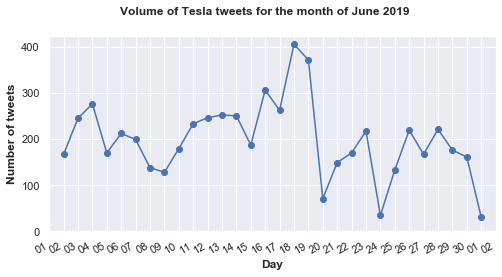

In [146]:
# Volume per day

import matplotlib.dates as mdates

sns.set_style("darkgrid")

days = mdates.DayLocator()
days_format = mdates.DateFormatter('%d')  

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot('timestamp_ms', 'Volume', data=avgsent, linestyle='-', marker='o')

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_format)


datemin = avgsent['timestamp_ms'].iloc[0]
datemax = avgsent['timestamp_ms'].iloc[-1]
ax.set_xlim(datemin+dt.timedelta(days=-1), datemax+dt.timedelta(days=1))
ax.set_ylim(0)


ax.format_xdata = mdates.DateFormatter('%d')

fig.autofmt_xdate()
fig.suptitle("Volume of Tesla tweets for the month of June 2019", fontweight='bold')
ax.set_xlabel('Day', fontweight='bold')
ax.set_ylabel('Number of tweets', fontweight='bold')

plt.savefig('Volume.png')
plt.show()

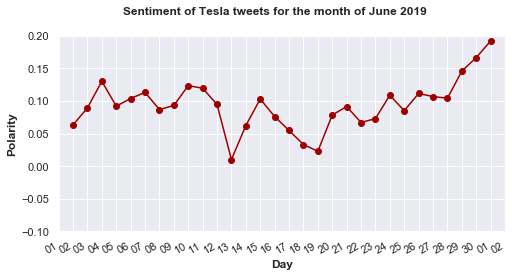

In [147]:
%matplotlib inline
sns.set_style("darkgrid")

days = mdates.DayLocator()
days_format = mdates.DateFormatter('%d')  

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot('timestamp_ms', 'Polarity', data=avgsent, linestyle='-', marker='o',color='#9e0000')

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_format)


datemin = avgsent['timestamp_ms'].iloc[0]
datemax = avgsent['timestamp_ms'].iloc[-1]
ax.set_xlim(datemin+dt.timedelta(days=-1), datemax+dt.timedelta(days=1))
ax.set_ylim(-0.1,0.2)


ax.format_xdata = mdates.DateFormatter('%d')

fig.autofmt_xdate()
fig.suptitle("Sentiment of Tesla tweets for the month of June 2019", fontweight='bold')
ax.set_xlabel('Day', fontweight='bold')
ax.set_ylabel('Polarity', fontweight='bold')

plt.savefig('Sentiment.png')
plt.show()

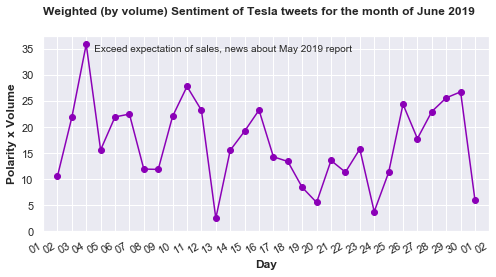

In [179]:
%matplotlib inline
sns.set_style("darkgrid")

days = mdates.DayLocator()
days_format = mdates.DateFormatter('%d')  

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot('timestamp_ms', 'WeightedSent', data=avgsent, linestyle='-', marker='o',color='#8b00b7')

ax.xaxis.set_major_locator(days)
ax.xaxis.set_major_formatter(days_format)


datemin = avgsent['timestamp_ms'].iloc[0]
datemax = avgsent['timestamp_ms'].iloc[-1]
ax.set_xlim(datemin+dt.timedelta(days=-1), datemax+dt.timedelta(days=1))
ax.set_ylim(0)


ax.format_xdata = mdates.DateFormatter('%d')

fig.autofmt_xdate()
fig.suptitle("Weighted (by volume) Sentiment of Tesla tweets for the month of June 2019", fontweight='bold')
ax.set_xlabel('Day', fontweight='bold')
ax.set_ylabel('Polarity x Volume', fontweight='bold')


arrow_x = avgsent['timestamp_ms'].iloc[2]
arrow_y = avgsent['WeightedSent'].iloc[2]
label_x = avgsent['timestamp_ms'].iloc[2]
label_y = avgsent['WeightedSent'].iloc[2]


ax.annotate(
    "   Exceed expectation of sales, news about May 2019 report",
    xy=(arrow_x, arrow_y),
    xytext=(label_x, label_y),
    arrowprops=dict(facecolor='black', shrink=0.3),
            horizontalalignment='left', verticalalignment='top')

plt.savefig('WeightedSentiment.png')
plt.show()